# 1 - Perkenalan

- Nama = Luvi Puspitasari
- Batch = 012
- Dataset Source = https://www.kaggle.com/code/sanikamal/text-classification-with-python-and-keras/data
- Dataset = Sentiment Labelled Sentences Dataset

# 2 - Import Library

In [152]:
# # mount google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [153]:
# # navigasi ke home folder

# % cd /content/drive/MyDrive/

In [154]:
# # cek folder yang ada ditempat sekarang

# ! ls

In [155]:
# # masuk ke tf serving

# % cd tf_serving

In [156]:
# import library

import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# exploratory dataset
from nltk.corpus import stopwords 


# text preprocessing
import string
import regex
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Metrics and Validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# embedding layer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding

from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential


from urllib import request

In [157]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3 - Loading Dataset

We have 3 dataset :
> 1. Amazon datset = this data consists of Amazon customer reviews (input text) and star rating (output labels) for learning how to train fast text for sentimen analysis,
> 2. IMDb dataset = In this dataset (Internet Movie Database), in this dataset we will review comments from movie, tv shows, and some videos,
> 3. yelp dataset = a food service delivery order where we will review comments from customers

In this, we have to predict the number of positive and negative reviewss based on sentiemnts by using difference classification models.

In [158]:
# Loading Dataset

# Dataset amazon
amazon_data = pd.read_csv("amazon_cells_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset imdb
imdb_data = pd.read_csv("imdb_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset yeld
yelp_data = pd.read_csv("yelp_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

Datasets = {"amazon":amazon_data,"imdb":imdb_data,"yelp":yelp_data}

In [159]:
# Amazon dataset info and descibe

print('amazons data shape:', amazon_data.shape)
print('='*50)
amazon_data.info()
print('='*50)
amazon_data.describe().T

amazons data shape: (1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,count,mean,std,min,25%,50%,75%,max
sentiment,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [160]:
# imdb dataset info and descibe

print('amazons data shape:', imdb_data.shape)
print('='*50)
imdb_data.info()
print('='*50)
imdb_data.describe().T

amazons data shape: (748, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


,count,mean,std,min,25%,50%,75%,max
sentiment,748.0,0.516043,0.500077,0.0,0.0,1.0,1.0,1.0


In [161]:
# yelp dataset info and descibe

print('amazons data shape:', yelp_data.shape)
print('='*50)
yelp_data.info()
print('='*50)
yelp_data.describe().T

amazons data shape: (1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,count,mean,std,min,25%,50%,75%,max
sentiment,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [162]:
# head amazon dataset

amazon_data.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [163]:
# head imdb daataset

imdb_data.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [164]:
# head yelp dataset

yelp_data.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [165]:
# tail amazon dataset

amazon_data.tail()

,text,sentiment
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [166]:
# tail imdb dataset

imdb_data.tail()

,text,sentiment
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0
747,All in all its an insult to one's intelligence...,0


In [167]:
# tail yelp dataset

yelp_data.tail()

,text,sentiment
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [168]:
# let's concate the dataset

amazon_data['source'] = 'amazon'
imdb_data['source'] = 'imdb'
yelp_data['source'] = 'yelp'

data = pd.concat(list(Datasets.values())).reset_index(drop=True)
data

,text,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [169]:
# concate dataset info and descibe

print('overall we have data shapes : '+str(data.shape))
print('='*50)
data.info()
print('='*50)
data.describe().T

overall we have data shapes : (2748, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2748 non-null   object
 1   sentiment  2748 non-null   int64 
 2   source     2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB


,count,mean,std,min,25%,50%,75%,max
sentiment,2748.0,0.504367,0.500072,0.0,0.0,1.0,1.0,1.0


# 4 - Data Exploratory

> From data exploratory, we can explore the original dataset about distribution, 

In [170]:
# we want to know how many customers give sentiment 0 and 1 for each company

pd.crosstab(data.sentiment, data.source)

source,amazon,imdb,yelp
sentiment,,,
0,500,362,500
1,500,386,500


> - that look balance dataset
> - sentiment feature on amazon and yelp has a percentage of 50:50, but on imdb has 24 data difference

In [171]:
# total of sentiment

data.sentiment.value_counts()

1    1386
0    1362
Name: sentiment, dtype: int64

> 1 sentiment more than 0 sentiment, their difference is only 24 data, when we summery the dataset, we get 2748 rows. it means we have no missing values at sentiment features

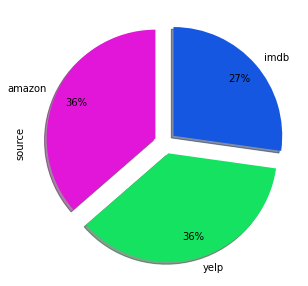

In [172]:
# pie chart to known the data distribution each company

data['source'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                   shadow=True,
                                   startangle=90,
                                   pctdistance=0.8,
                                   explode= (0.1,0.1,0.1),
                                   colors=['#e216d9', '#16e261', '#1657e2'],
                                   figsize=(5,5))

> pie chart shows amazon data and yelp data are more dominant than imdb

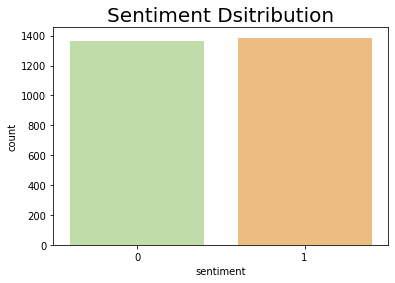

In [173]:
sns.countplot(x= 'sentiment', palette = 'Spectral_r', data=data)
plt.title('Sentiment Dsitribution', size = 20)
plt.xlabel('sentiment')
plt.show()

> distribution of sentiment 0 and sentiment 1 balance

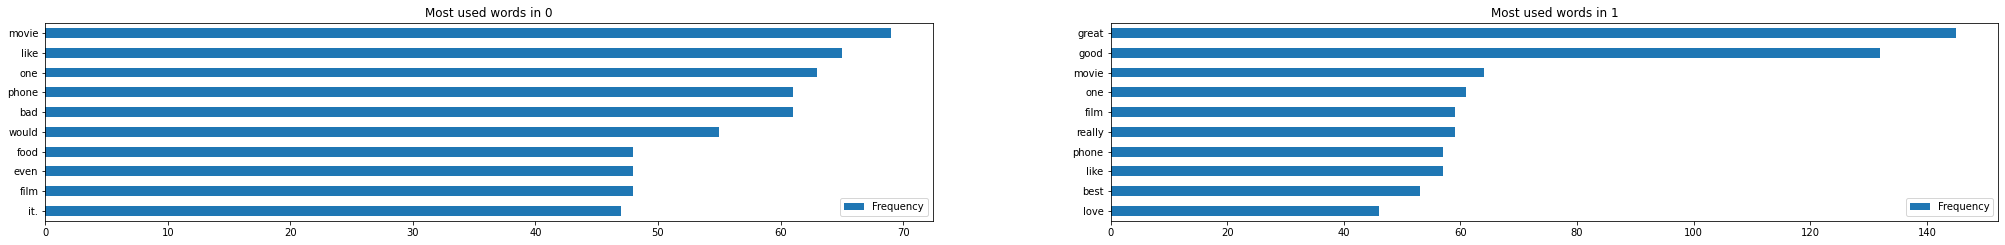

In [174]:
data['text'] = data['text'].str.lower()

#get stopwords from nltk library
stop_english = stopwords.words("english")
other_words_to_take_out = ['1', '0']
stop_english.extend(other_words_to_take_out)

#put dataframe of Top-10 words in dict for all discourse types
counts_dict = {}
for dt in data['sentiment'].unique():
    df = data.query('sentiment == @dt')
    text = df.text.apply(lambda x: x.split()).tolist()
    text = [item for elem in text for item in elem]
    df1 = pd.Series(text).value_counts().to_frame().reset_index()
    df1.columns = ['Word', 'Frequency']
    df1 = df1[~df1.Word.isin(stop_english)].head(10)
    df1 = df1.set_index("Word").sort_values(by = "Frequency", ascending = True)
    counts_dict[dt] = df1
    

plt.figure(figsize=(35, 20))
plt.subplots_adjust(hspace=0.5)

keys = list(counts_dict.keys())

for n, key in enumerate(keys):
    ax = plt.subplot(4, 2, n + 1)
    ax.set_title(f"Most used words in {key}")
    counts_dict[keys[n]].plot(ax=ax, kind = 'barh')
    plt.ylabel("")

plt.show()

> There are top 10 words each positive text and negative text



Word Cloud for Negative Text




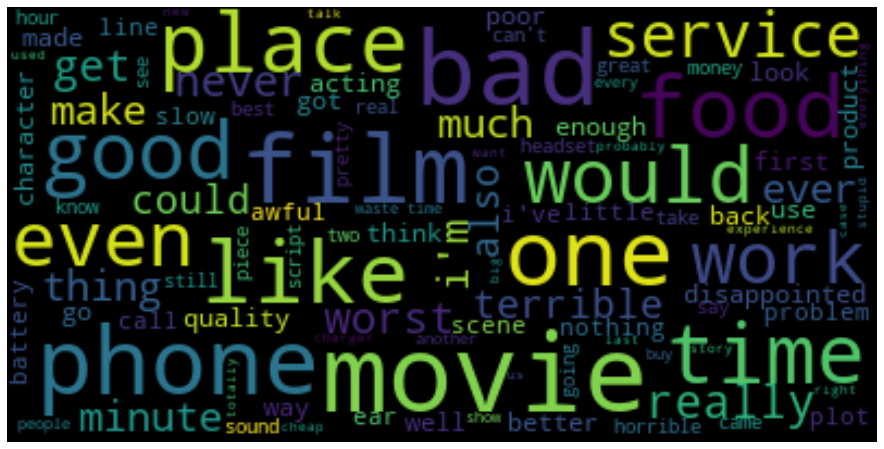



Word Cloud for Positive Text




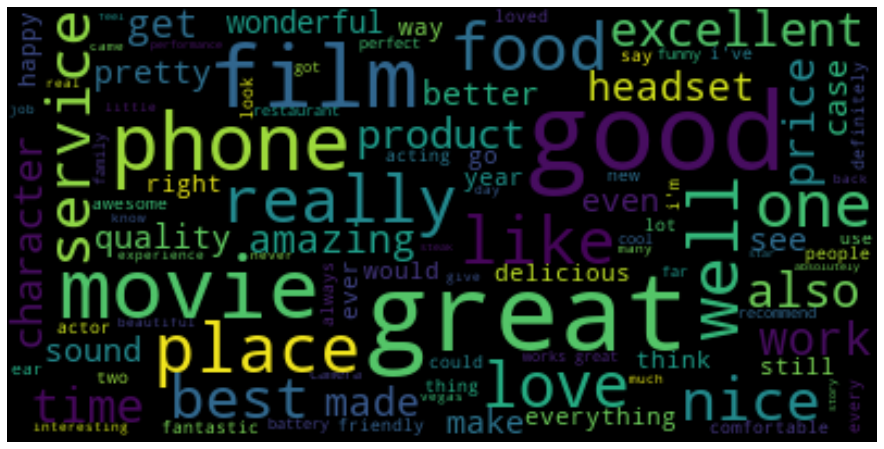

In [175]:
# stop_word to classification text, we have 2 sentiment, they are negative word and positive word
# stop_word make us focus on the important words instead

stop_words= set(stopwords.words("english"))

wc = WordCloud(width=400,
               height=200,
               max_words=100,
               stopwords=stop_words,
               background_color='black',
               max_font_size=50)

negative_word = data.query("sentiment == 0").text
concat_negative_word = negative_word.str.cat(sep=" ")

positive_text = data.query("sentiment == 1").text
concat_positive_text = positive_text.str.cat(sep=" ")

print('\n\nWord Cloud for Negative Text\n\n')
wc.generate(concat_negative_word)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('\n\nWord Cloud for Positive Text\n\n')
wc.generate(concat_positive_text)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

> Stopwords are the words in any language which does not add much meaning to a sentence. Here are 100 words for positive text and 100 words for negative text

# 5 - Text Preprocessing

- Missing Values,
- Case folding = make word tobe consist word, remove the wordstop, punctuation.
- Stemming and Lemmatization
- Tokenizing and Parsing = process data to be difference unit. In the Toknizing a sentences we will removing number and punctuation

**Missing Values**

In [176]:
data.isnull().sum().any()

False

> we have no missing value in this dataset

**Case Folding**

In [177]:
# trial for sentence index number 3
print(data.text[3])

tied to charger for conversations lasting more than 45 minutes.major problems!!


In [178]:
# change the data text to be lower text

teks = data.text[3]
teks_lower = teks.lower()
teks_lower

'tied to charger for conversations lasting more than 45 minutes.major problems!!'

In [179]:
# remove the punctuation in data index number 3

teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'tied to charger for conversations lasting more than 45 minutesmajor problems'

In [180]:
# remove punctuation for all dataset

teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip()
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc

'tied to charger for conversations lasting more than    minutes major problems  '

In [181]:
# remove stopwords more than 1 for each word

stpwds_id = list(set(stopwords.words('english')))
stpwds_id.append('oh')

tokens = word_tokenize(teks_punc)

text_stopwords = ' '.join([word for word in tokens if word not in stpwds_id])
text_stopwords

'tied charger conversations lasting minutes major problems'

**Stemming and Lemmatization**

In [182]:
# stemming with porterstemmer

stemmer = PorterStemmer() 
porter_stemmed = [stemmer.stem(text_stopwords) for token in tokens]
print(porter_stemmed)
len(porter_stemmed)

['tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem', 'tied charger conversations lasting minutes major problem']


11

In [183]:
#Stemming

stemmer = PorterStemmer()

teks_stemm   = stemmer.stem(text_stopwords)
teks_stemm

'tied charger conversations lasting minutes major problem'

In [184]:
# remove punctuation for all datset after using stemmer

def text_proses(teks):
  teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
  teks_punc = teks_punc.strip()
  teks_punc = re.sub("[^A-Za-z\s\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_id])
  teks = stemmer.stem(teks)
  return teks

In [185]:
# apply text processed into dataframe

data['text_processed'] = data['text'].apply(lambda x: text_proses(x))
data

,text,sentiment,source,text_processed
0,so there is no way for me to plug it in here i...,0,amazon,way plug us unless go converter .
1,"good case, excellent value.",1,amazon,"good case , excellent value ."
2,great for the jawbone.,1,amazon,great jawbone .
3,tied to charger for conversations lasting more...,0,amazon,tied charger conversations lasting 45 minutes....
4,the mic is great.,1,amazon,mic great .
...,...,...,...,...
2743,i think food should have flavor and texture an...,0,yelp,think food flavor texture lacking .
2744,appetite instantly gone.,0,yelp,appetite instantly gone .
2745,overall i was not impressed and would not go b...,0,yelp,overall impressed would go back .
2746,"the whole experience was underwhelming, and i ...",0,yelp,"whole experience underwhelming , think 'll go ..."


**Tokenization & Word Embedding**

In [186]:
X = data.text_processed
y = data.sentiment

In [193]:
# Split into train, test, and validation
X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)
print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (1758,)
Validation data shape: (440,)
Testing data shape: (550,)


In [195]:
# Bags Of Word model
# it is used to conver text documents to numerical vector or bag of words

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

print('BOW X_train : ', X_train_vec.shape)
print('BOW X_test : ', X_test_vec.shape)
print('BOW X_val : ', X_val_vec.shape)

BOW X_train :  (1758, 3745)
BOW X_test :  (550, 3745)
BOW X_val :  (440, 3745)


In [201]:
X_val_vec

<440x3745 sparse matrix of type '<class 'numpy.int64'>'
	with 2496 stored elements in Compressed Sparse Row format>

In [202]:
# # Check Dictionary key

# Vectorize.vocabulary_.keys()

**Term Frequency-Inverse Document Frequency model (TFIDF)**
- It is used to convert text documents to matrix of tfidf features.

In [198]:
# Tfidf vectorizer
Transformer = TfidfTransformer()

# transformed train reviews
X_train_tfidf = Transformer.fit_transform(X_train_vec)

# transformed test reviews
X_test_tfidf = Transformer.transform(X_test_vec)

# transformed test reviews
X_val_tfidf = Transformer.transform(X_val_vec)

print('X_train_tfidf shape : ', X_train_vec.shape)
print('X_test_tfidf shape : ', X_test_vec.shape)
print('X_val_tfidf shape : ', X_val_vec.shape)

X_train_tfidf shape :  (1758, 3745)
X_test_tfidf shape :  (550, 3745)
X_val_tfidf shape :  (440, 3745)


In [200]:
X_val_tfidf

<440x3745 sparse matrix of type '<class 'numpy.float64'>'
	with 2496 stored elements in Compressed Sparse Row format>

**Embedding Layer in Deep Learning with Tensorflow**

In [42]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("word count:",jml_vocab)
print("Maximum sentence length:",max_sen_len,"word")

word count: 3865
Maximum sentence length: 1017 word


In [43]:
# Text Vectorization is the process of converting text into numerical representation

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [44]:
text_vectorization([data.text_processed[2]])

<tf.Tensor: shape=(1, 1017), dtype=int64, numpy=array([[  5, 790,   0, ...,   0,   0,   0]])>

In [45]:
text_vectorization.get_vocabulary()[1]

'[UNK]'

In [46]:
# embeding parameter

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [47]:
# embedding result

emb_res = embedding(text_vectorization([data.text_processed[0]]))
emb_res

<tf.Tensor: shape=(1, 1017, 128), dtype=float32, numpy=
array([[[ 0.04116518,  0.01675326,  0.04333016, ..., -0.04073907,
          0.00389757,  0.02804365],
        [ 0.00880789, -0.01728023,  0.0021194 , ..., -0.01652092,
         -0.04815627,  0.04654265],
        [-0.01427203,  0.04769272,  0.0348887 , ..., -0.02196106,
          0.03884293, -0.04344362],
        ...,
        [-0.04480982,  0.00739954, -0.01314468, ...,  0.04425564,
         -0.00611844,  0.01342014],
        [-0.04480982,  0.00739954, -0.01314468, ...,  0.04425564,
         -0.00611844,  0.01342014],
        [-0.04480982,  0.00739954, -0.01314468, ...,  0.04425564,
         -0.00611844,  0.01342014]]], dtype=float32)>

**Preprocessing for modeling Deep Learning - Fully Connected Layer**

In [49]:
# encoding for categorical data
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_val_ohe = to_categorical(y_val)

> encoding categorical data, change categorical tibe numerical

In [50]:
# let's check categorical data
y_train_ohe
pd.get_dummies(y_train)

,0,1
227,1,0
95,0,1
574,0,1
959,1,0
2067,0,1
...,...,...
764,1,0
1676,0,1
286,1,0
822,0,1


**Input Pipeline**

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

In [52]:
def get_batches(X, y, shuffle_buffer_size, batch_size, shuffle=False):
  data_ds = tf.data.Dataset.from_tensor_slices((X,y))
  preprocessed_data=data_ds
  data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)

  return data_batches

In [53]:
# BoW
training_BoW = get_batches(X_train, y_train_ohe,X_train.shape[0], 32, shuffle=True)
test_BoW = get_batches(X_test, y_test_ohe,X_test.shape[0], 32, shuffle=True)
val_BoW = get_batches(X_val, y_val_ohe,X_val.shape[0], 32, shuffle=True)

# TFIDF
training_tfidf = get_batches(X_train_tfidf.todense(), y_train_ohe,X_train_tfidf.shape[0], 32, shuffle=True)
test_tfidf = get_batches(X_test_tfidf.todense(), y_test_ohe,X_test_tfidf.shape[0], 32, shuffle=True)
val_tfidf = get_batches(X_val_tfidf.todense(), y_val_ohe,X_test_tfidf.shape[0], 32, shuffle=True)


#6 - Model Definition

**Machine Learning**

- RandomForest Classifier

In [57]:
rf = RandomForestClassifier()

-  MultinomialNB

In [58]:
nb = MultinomialNB()

####Deep Learning - Fully Connected Layer

**1. Deep Neural Network (DNN)**

In [59]:
dnn_1 = Sequential()
dnn_2 = Sequential()

**2. LSTM**

In [60]:
lstm1 = Sequential()
lstm2 = Sequential()

**3. GRU**

In [61]:
gru1 = Sequential()
gru2 = Sequential()

# 7 - Model Training 

####Machine Learning

**1. RandomForestClassifier**

In [62]:
# RandomForestClassifier

# fitting the model for bag of words
rf_bow = rf.fit(X_train_vec, y_train)
print(rf_bow)
# fitting the model for tfidf
rf_tfidf = rf.fit(X_train_tfidf, y_train)
print(rf_tfidf)

RandomForestClassifier()
RandomForestClassifier()


**2. MultinomialNB**

In [63]:
# MultinomialNB

# fitting the model for bag of words
nb_bow = nb.fit(X_train_vec, y_train)
print(nb_bow)
# fitting the model for tfidf
nb_tfidf = nb.fit(X_train_tfidf, y_train)
print(nb_tfidf)


MultinomialNB()
MultinomialNB()


####Deep Learning - Fully Connected Layer

**1. Deep Neural Network (DNN)**

In [64]:
# dnn using BoW

dnn_1.add(text_vectorization)
dnn_1.add(embedding)
dnn_1.add(GlobalAveragePooling1D())
dnn_1.add(Dense(64,activation='relu'))
dnn_1.add(Dense(32,activation='relu'))
dnn_1.add(Dense(2,activation='sigmoid'))

dnn_1.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')


In [65]:
# dnn using tfidf

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

dnn_2.add(embedding)
dnn_2.add(GlobalAveragePooling1D())
dnn_2.add(Dense(64,activation='relu'))
dnn_2.add(Dense(32,activation='relu'))
dnn_2.add(Dense(2,activation='sigmoid'))

dnn_2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

**2. LSTM**

In [66]:
# lstm using BoW

lstm1 = Sequential()
lstm1.add(text_vectorization)
lstm1.add(embedding)
lstm1.add(LSTM(32))
lstm1.add(Dense(2,activation='sigmoid'))

lstm1.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [67]:
# lstm using TFIDF

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

lstm2 = Sequential()
lstm2.add(embedding)
lstm2.add(LSTM(32))
lstm2.add(Dense(2,activation='sigmoid'))

lstm2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')


**3. GRU**

In [68]:
# GRU using BoW

gru1.add(text_vectorization)
gru1.add(embedding)
gru1.add(GRU(32))
gru1.add(Dense(2,activation='sigmoid'))

gru1.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [69]:
# GRU using TFIDF

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jml_vocab
                      )

gru2.add(embedding)
gru2.add(GRU(32))
gru2.add(Dense(2,activation='sigmoid'))

gru2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

# 8 - Model Evaluation

####Machine learning

**1. RandomForest Classifier**

In [70]:
# RandomForestClassifier
print('----------classification report for Bow RandomForestClassifier----------')
print(classification_report(y_train, rf.predict(X_train_vec)))

print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_train, rf.predict(X_train_tfidf)))

----------classification report for Bow RandomForestClassifier----------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       872
           1       0.85      0.99      0.91       886

    accuracy                           0.90      1758
   macro avg       0.92      0.90      0.90      1758
weighted avg       0.92      0.90      0.90      1758

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       886

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



> The results from random forest are very good but have the potential for overfit, so it needs to be tried in a test-set

**2. MultinomialNB**


In [71]:
# MultinomialNB
print('----------classification report for Bow MultinomalNB----------')
print(classification_report(y_train, nb.predict(X_train_vec)))

print('----------classification report for TFDIF MultinomalNB----------')
print(classification_report(y_train, nb.predict(X_train_tfidf)))

----------classification report for Bow MultinomalNB----------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       872
           1       0.92      0.97      0.94       886

    accuracy                           0.94      1758
   macro avg       0.94      0.94      0.94      1758
weighted avg       0.94      0.94      0.94      1758

----------classification report for TFDIF MultinomalNB----------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       872
           1       0.94      0.97      0.96       886

    accuracy                           0.96      1758
   macro avg       0.96      0.95      0.96      1758
weighted avg       0.96      0.96      0.96      1758



> the results from MultinomialNB are very good too but we choose random forest to train in test-set

####Deep Learning - Fully Connected Layer

**1 - DNN**

using word embedding 1

In [72]:
# model dnn using BoW

model_dnn_hist_1 = dnn_1.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_train, y_train_ohe))


Epoch 1/50
55/55 [==============================] - 3s 31ms/step - loss: 0.6935 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/50
55/55 [==============================] - 2s 34ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 3/50
55/55 [==============================] - 2s 36ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 4/50
55/55 [==============================] - 2s 34ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 5/50
55/55 [==============================] - 2s 32ms/step - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 6/50
55/55 [==============================] - 2s 36ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4960
Epoch 7/50
55/55 [==============================] - 1s 26ms/step - loss: 0.6934 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 8/50
55


*   loss='binary_crossentropy because my output label is binary,
*   softmax is proper activation function for binary data


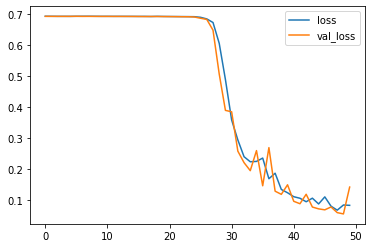

In [73]:
metrics = pd.DataFrame(model_dnn_hist_1.history)
metrics[['loss', 'val_loss']].plot()

In [74]:
dnn_1.evaluate(X_train, y_train_ohe) 

55/55 [==============================] - 1s 10ms/step - loss: 0.1428 - accuracy: 0.9346


[0.14282512664794922, 0.9345847368240356]

In [75]:
dnn_1.evaluate(training_BoW)

55/55 [==============================] - 1s 11ms/step - loss: 0.1428 - accuracy: 0.9346


[0.14282512664794922, 0.9345847368240356]

Using Word Embedding 2

In [76]:
# model dnn using TFIDF

model_dnn_hist_2 = dnn_2.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_train_tfidf.todense(), y_train_ohe))

Epoch 1/50
55/55 [==============================] - 6s 97ms/step - loss: 0.6935 - accuracy: 0.4824 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/50
55/55 [==============================] - 6s 102ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/50
55/55 [==============================] - 5s 95ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 4/50
55/55 [==============================] - 6s 105ms/step - loss: 0.6932 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/50
55/55 [==============================] - 5s 88ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/50
55/55 [==============================] - 5s 87ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/50
55/55 [==============================] - 6s 114ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 8/50

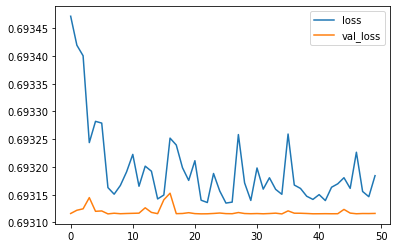

In [77]:
metrics = pd.DataFrame(model_dnn_hist_2.history)
metrics[['loss', 'val_loss']].plot()

In [78]:
dnn_2.evaluate(X_train_tfidf.todense(), y_train_ohe) 

55/55 [==============================] - 2s 28ms/step - loss: 0.6931 - accuracy: 0.5040


[0.6931161880493164, 0.5039817690849304]

### LSTM

**Word Embedding 1**

In [79]:
# model lstm using BoW

model_lstm_hist_1 = lstm1.fit(X_train,
                         y_train_ohe,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_train, y_train_ohe))

Epoch 1/10
55/55 [==============================] - 36s 623ms/step - loss: 0.6938 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 2/10
55/55 [==============================] - 34s 617ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/10
55/55 [==============================] - 33s 603ms/step - loss: 0.6934 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 4/10
55/55 [==============================] - 34s 612ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/10
55/55 [==============================] - 33s 607ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/10
55/55 [==============================] - 34s 623ms/step - loss: 0.6933 - accuracy: 0.4869 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/10
55/55 [==============================] - 34s 617ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040

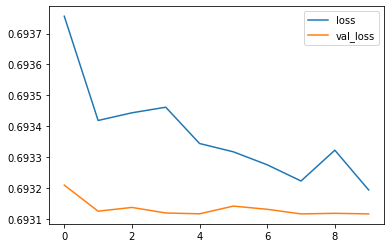

In [80]:
metrics = pd.DataFrame(model_lstm_hist_1.history)
metrics[['loss', 'val_loss']].plot()

In [81]:
lstm1.evaluate(X_train, y_train_ohe) 

55/55 [==============================] - 5s 94ms/step - loss: 0.6931 - accuracy: 0.5040


[0.693115770816803, 0.5039817690849304]

**Word Embedding 2**

In [82]:
# model lstm using tfidf

model_lstm_hist_2 = lstm2.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_train_tfidf.todense(), y_train_ohe))

Epoch 1/10
55/55 [==============================] - 171s 3s/step - loss: 0.6936 - accuracy: 0.4767 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/10
55/55 [==============================] - 169s 3s/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/10
55/55 [==============================] - 169s 3s/step - loss: 0.6935 - accuracy: 0.4892 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 4/10
55/55 [==============================] - 166s 3s/step - loss: 0.6935 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/10
55/55 [==============================] - 168s 3s/step - loss: 0.6933 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 6/10
55/55 [==============================] - 168s 3s/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/10
55/55 [==============================] - 169s 3s/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 8/10
55

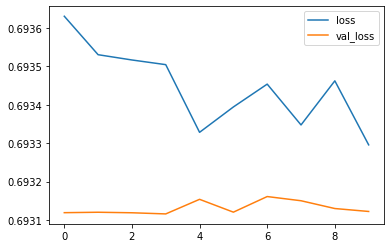

In [83]:
metrics = pd.DataFrame(model_lstm_hist_2.history)
metrics[['loss', 'val_loss']].plot()

In [84]:
lstm2.evaluate(X_train_tfidf.todense(), y_train_ohe) 

55/55 [==============================] - 17s 315ms/step - loss: 0.6931 - accuracy: 0.5040


[0.6931223273277283, 0.5039817690849304]

**3. GRU**

In [85]:
# GRU using BoW

GRU_gru_hist_1 = gru1.fit(X_train,
                         y_train_ohe,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/10
55/55 [==============================] - 32s 538ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6958 - val_accuracy: 0.4800
Epoch 2/10
55/55 [==============================] - 29s 535ms/step - loss: 0.6937 - accuracy: 0.5040 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 3/10
55/55 [==============================] - 29s 536ms/step - loss: 0.6934 - accuracy: 0.4903 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 4/10
55/55 [==============================] - 29s 533ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 5/10
55/55 [==============================] - 29s 534ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 6/10
55/55 [==============================] - 29s 535ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 7/10
55/55 [==============================] - 29s 532ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6938 - val_accuracy: 0.4800

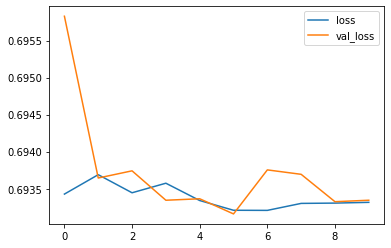

In [86]:
metrics = pd.DataFrame(GRU_gru_hist_1.history)
metrics[['loss', 'val_loss']].plot()

In [87]:
gru1.evaluate(X_train, y_train_ohe)

55/55 [==============================] - 5s 83ms/step - loss: 0.6931 - accuracy: 0.5040


[0.693121612071991, 0.5039817690849304]

Using Word Embedding 2

In [107]:
# GRU using TFIDF

model_gru_hist_2 = gru2.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test_tfidf.todense(), y_test_ohe))

Epoch 1/10
55/55 [==============================] - 186s 3s/step - loss: 0.6936 - accuracy: 0.4790 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 2/10
55/55 [==============================] - 166s 3s/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6939 - val_accuracy: 0.4800
Epoch 3/10
55/55 [==============================] - 162s 3s/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.4800
Epoch 4/10
55/55 [==============================] - 160s 3s/step - loss: 0.6933 - accuracy: 0.4881 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 5/10
55/55 [==============================] - 160s 3s/step - loss: 0.6933 - accuracy: 0.4869 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 6/10
55/55 [==============================] - 163s 3s/step - loss: 0.6933 - accuracy: 0.4824 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 7/10
55/55 [==============================] - 161s 3s/step - loss: 0.6934 - accuracy: 0.4858 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 8/10
55

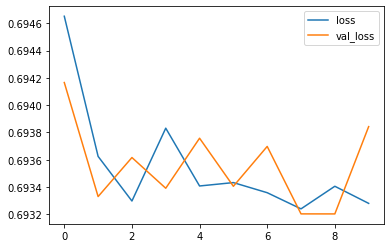

In [89]:
metrics = pd.DataFrame(model_gru_hist_2.history)
metrics[['loss', 'val_loss']].plot()

In [90]:
gru2.evaluate(X_train_tfidf.todense(), y_train_ohe) 

55/55 [==============================] - 17s 315ms/step - loss: 0.6931 - accuracy: 0.5040


[0.6931382417678833, 0.5039817690849304]

***Test-Set***

we will try the best model of machine learning and deep learning

In [ ]:
# Machine learning (Random Forest Classifier)

print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_test, rf.predict(X_test_tfidf)))

In [ ]:
# model dnn using BoW

model_dnn_hist_test = dnn_1.fit(X_test,
                         y_test_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

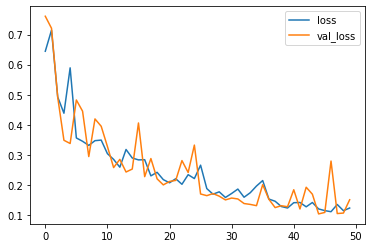

In [93]:
# let's see the graph's classification report

metrics = pd.DataFrame(model_dnn_hist_test.history)
metrics[['loss', 'val_loss']].plot()

In [1]:
# accuracy from classification report

dnn_1.evaluate(test_BoW)

NameError: ignored

# 9 - Model Saving

In [ ]:
dnn_1.summary()

In [96]:
# freeze model
# for layer in model.layers:
# layer.trainable = False

dnn_1.trainable=False

In [97]:
dnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1017)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1017, 128)         494720    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 6

In [98]:
# model = dnn_1.save("CustomerReview")

# 10. Model Inference

**Model Inference RandomForest Classification - Machine Learning**

In [99]:
print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_val, rf.predict(X_val_tfidf)))

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       204
           1       0.82      0.64      0.72       236

    accuracy                           0.73       440
   macro avg       0.74      0.74      0.73       440
weighted avg       0.75      0.73      0.73       440



**Model Inference using DNN - Deep Learning**

In [100]:
# model dnn using BoW

model_dnn_hist_inf = dnn_1.fit(X_val,
                         y_val_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
14/14 [==============================] - 1s 39ms/step - loss: 0.9033 - accuracy: 0.7159 - val_loss: 0.7905 - val_accuracy: 0.7568
Epoch 2/50
14/14 [==============================] - 0s 36ms/step - loss: 0.7955 - accuracy: 0.7295 - val_loss: 0.8827 - val_accuracy: 0.6750
Epoch 3/50
14/14 [==============================] - 0s 27ms/step - loss: 0.6934 - accuracy: 0.7364 - val_loss: 0.4390 - val_accuracy: 0.8000
Epoch 4/50
14/14 [==============================] - 0s 27ms/step - loss: 0.4525 - accuracy: 0.8091 - val_loss: 0.3999 - val_accuracy: 0.8136
Epoch 5/50
14/14 [==============================] - 0s 26ms/step - loss: 0.4048 - accuracy: 0.8136 - val_loss: 0.4426 - val_accuracy: 0.7773
Epoch 6/50
14/14 [==============================] - 0s 26ms/step - loss: 0.4354 - accuracy: 0.7909 - val_loss: 0.4194 - val_accuracy: 0.8250
Epoch 7/50
14/14 [==============================] - 0s 26ms/step - loss: 0.4401 - accuracy: 0.7955 - val_loss: 0.3884 - val_accuracy: 0.8068
Epoch 8/50
14

In [ ]:
# Let's see the result of classification report

metrics = pd.DataFrame(model_dnn_hist_inf.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
dnn_1.evaluate(val_BoW)

In [ ]:
X_val

In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_proses).fit(X)
print(len(vocab.vocabulary_))
r0 = X[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)

In [ ]:
# Negative review

pr = data['text'][0]
print(pr)
print("Actual Sentiment Rating", data['sentiment'][0])
pr_t = vocab.transform([pr])
print("Prediction Rating:")
# rf.predict(pr_t)[0]

# Conclusion :

DATASET
- dataset : dataset is customer review from 3 companies (amazon, imdb, and yelp)
- after the three data are combined, there are 2,748 rows and 3 columns

EXPLORATORY DATASET
- sentiment feature on amazon and yelp has a percentage of 50:50, but on imdb has 24 data difference
- 1 sentiment more than 0 sentiment, their difference is only 24 data, when we summery the dataset, we get 2748 rows. it means we have no missing values ​​at sentiment features
- In the exploratory data, it can be seen that there are words that are dominant from sentiment 0, for example: movie, like, one. sentiment 1 example: great, good, movie

TEXT PREPROCESSING
- datasets have no missing values
- case fold change the data text to be lower text, remove punctuation, and stopword
- Stemming changes a word into a root word without knowing the context of the word like cutting off the ends of words
- Lemmatization turns a word into a root word by knowing the context of the word
- Tokenizing and Parsing = process data to be difference units. In the Tokenizing a sentences we will remove number and punctuation
  - split dataset to be train-set, test-set, val-set
    - Training data shapes: (1758,)
    - Validation of shape data: (440,)
    - Testing shape data: (550,)
  - bags of Word model it is used to convert text documents to numerical vector or bag of words. we are using CountVectorizer(). so the results are
    - BOW X_train : (1758, 3745)
    - BOW X_test : (550, 3745)
    - BOW X_val : (440, 3745)
- Term Frequency-Inverse Document Frequency model (TFIDF) it is used to convert text documents to matrix of tfidf features. TFIDF uses the TfidfTransformer() library, resulting in:
    - X_train_tfidf shape : (1758, 3745)
    - X_test_tfidf shape : (550, 3745)
    - X_val_tfidf shape : (440, 3745)

Embedding Layer in Deep Learning with Tensorflow
- Text Vectorization is the process of converting text into numerical representation
- embeddings initializer using uniform matrix
Preprocessing for modeling Deep Learning - Fully Connected Layer
- encoding categorical data, change categorical tibe numerical
- Input pipeline using Autotune

Model Definition
- Machine leaning
  - Random Forest Classifier (from the training results that have been carried out, Random forest has good results)
  - MultinomialNB (multinomial Naive Bayes classifier is suitable for classification with discrete features)
- Deep Learning
  all models using sequential
  - Deep Neural Network (DNN) (a neural network based algorithm that can be used for decision making)
  - LSTM (LSTM is able to remember a collection of information that has been stored for a long time, while deleting information that is no longer relevant)
  - GRU (make each recurrent unit to be able to catch dependencies in different time scales adaptively)
  each model using BOW and TFIDF

Model Training
  - machine learning model (Random forest and MultinomialNB use default parameters)
  - Deep learning using
    - first activation = relu,
    - last activation = sigmoid
    - loss = binary_crossentropy, because the desired output a g is in binary form
    - optimizer = adam (usually has good output)
    - metrics = accuracy (see train-set pattern)

Model Evaluation (Accuracy)
  - Random Forest (BOW): 94%
  - Random Forest (TFIDF): 100%
  - MultinomialNB (BOW): 94%
  - MultinomialNB (TFIDF): 96%
  - DNN (BOW): 93%
  - DNN (TFIDF): 50%
  - LSTM (BOW): 50%
  - LSTM (TFIDF): 50%
  - GRU (BOW): 50%
  - GRU (TFIDF): 50%

  TEST-SET
  - Machine learning using Random Forest Classifier and 50% tea result, overfit model
  - Deep Learning using DNN (BOW) and the result 97%, basemodel

INFERENCE SET
  - Data Validation is used to test the model in the Inference set, using the DNN(BOW) model and produces 96% accuracy, so that DNN (BOW) is the appropriate model for processing customer review sentiment

Reference =
*   https://www.kaggle.com/code/erikbruin/nlp-on-student-writing-eda
*   https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data
*   https://www.kaggle.com/code/dhgupta/stemming/notebook
* https://www.kaggle.com/code/andradaolteanu/siim-melanoma-competition-eda-augmentations
*https://www.kaggle.com/code/bhaveshkumar2806/complete-eda-and-visualization-of-text-data/notebook


